In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #use to make plots and graphs
import seaborn as sns  #data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings(action="ignore")

In [10]:
#loading the data from csv file to pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [11]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [13]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_dataset)


      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [17]:
# Introduce NaN values for testing
def randomly_replace_values(dataset, replace_fraction=0.3):
    for col in dataset.columns:
        num_to_replace = int(replace_fraction * len(dataset))
        indices = np.random.choice(dataset.index, num_to_replace, replace=False)
        dataset.loc[indices, col] = np.nan
    return dataset

insurance_dataset_nans = randomly_replace_values(insurance_dataset.copy(), replace_fraction=0.3)
print("\nDataset after introducing NaNs:")
print(insurance_dataset_nans)


Dataset after introducing NaNs:
       age  sex     bmi  children  smoker  region     charges
0     19.0  NaN  27.900       0.0     NaN     1.0  16884.9240
1     18.0  0.0  33.770       NaN     1.0     0.0         NaN
2     28.0  0.0  33.000       3.0     1.0     0.0         NaN
3      NaN  NaN  22.705       0.0     1.0     3.0         NaN
4      NaN  0.0     NaN       0.0     NaN     3.0         NaN
...    ...  ...     ...       ...     ...     ...         ...
1333   NaN  0.0     NaN       NaN     1.0     3.0  10600.5483
1334  18.0  1.0  31.920       0.0     1.0     2.0   2205.9808
1335  18.0  1.0  36.850       0.0     1.0     0.0         NaN
1336  21.0  1.0  25.800       NaN     1.0     NaN   2007.9450
1337  61.0  1.0  29.070       NaN     0.0     NaN  29141.3603

[1338 rows x 7 columns]


In [18]:
# Fill empty spaces (NaNs) with column-wise means
for col in insurance_dataset_nans.columns:
    if insurance_dataset_nans[col].dtype in ['float64', 'int64']:  # For numeric columns
        mean_value = insurance_dataset_nans[col].mean(skipna=True)  # Calculate mean ignoring NaNs
        insurance_dataset_nans[col].fillna(mean_value, inplace=True)
    else:  # For non-numeric columns
        mean_value = insurance_dataset_nans[col].dropna().mode()[0]  # Use mode for categorical columns
        insurance_dataset_nans[col].fillna(mean_value, inplace=True)

# Verify there are no NaN or empty spaces left
print("\nDataset after replacing NaNs with mean values:")
print(insurance_dataset_nans)


Dataset after replacing NaNs with mean values:
            age       sex        bmi  children    smoker    region  \
0     19.000000  0.503735  27.900000   0.00000  0.794023  1.000000   
1     18.000000  0.000000  33.770000   1.11953  1.000000  0.000000   
2     28.000000  0.000000  33.000000   3.00000  1.000000  0.000000   
3     39.421558  0.503735  22.705000   0.00000  1.000000  3.000000   
4     39.421558  0.000000  30.368911   0.00000  0.794023  3.000000   
...         ...       ...        ...       ...       ...       ...   
1333  39.421558  0.000000  30.368911   1.11953  1.000000  3.000000   
1334  18.000000  1.000000  31.920000   0.00000  1.000000  2.000000   
1335  18.000000  1.000000  36.850000   0.00000  1.000000  0.000000   
1336  21.000000  1.000000  25.800000   1.11953  1.000000  1.454642   
1337  61.000000  1.000000  29.070000   1.11953  0.000000  1.454642   

           charges  
0     16884.924000  
1     13252.908554  
2     13252.908554  
3     13252.908554  
4     

In [19]:
# Check for missing values again
print("\nMissing values after imputation:")
print(insurance_dataset_nans.isnull().sum())


Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Categorical Features:Sex,Shape,Region

In [20]:
#statistical measures of the dataset
insurance_dataset_nans.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000
mean,39.421558,0.503735,30.368911,1.11953,0.794023,1.454642,13252.908554
std,11.858758,0.418564,5.012365,1.01765,0.338555,0.955370,10084.435508
min,18.000000,0.000000,15.960000,0.00000,0.000000,0.000000,1121.873900
25%,32.000000,0.000000,27.930000,0.00000,0.794023,1.000000,6785.231462
50%,39.421558,0.503735,30.368911,1.11953,1.000000,1.454642,13252.908554
75%,47.000000,1.000000,32.300000,1.11953,1.000000,2.000000,13252.908554
max,64.000000,1.000000,52.580000,5.00000,1.000000,3.000000,63770.428010


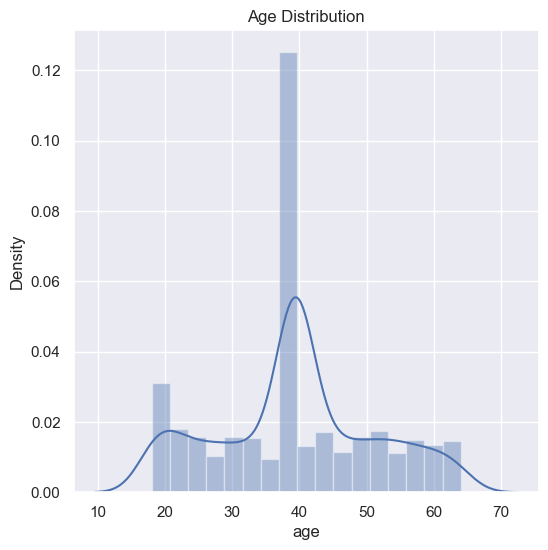

In [21]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['age'])
plt.title('Age Distribution')
plt.show()

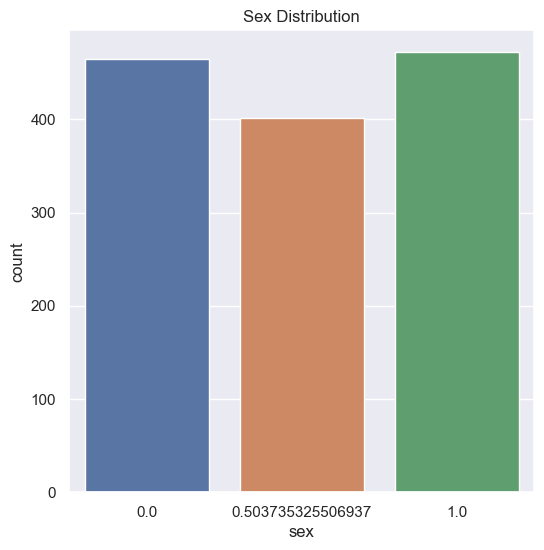

In [22]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset_nans)
plt.title('Sex Distribution')
plt.show()

In [23]:
insurance_dataset_nans['sex'].value_counts()

sex
1.000000    472
0.000000    465
0.503735    401
Name: count, dtype: int64

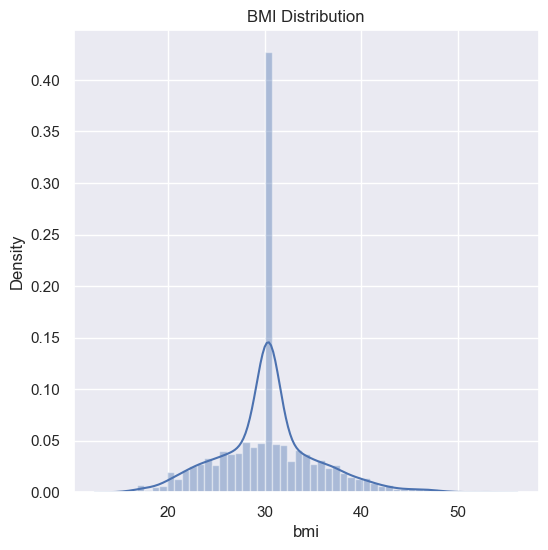

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['bmi'])
plt.title('BMI Distribution')
plt.show()

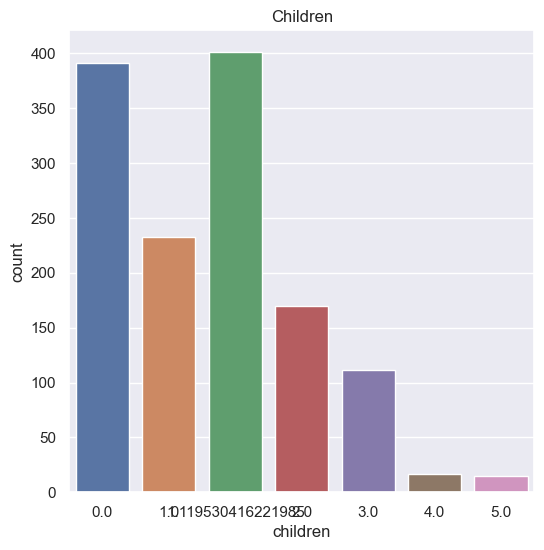

In [25]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset_nans)
plt.title('Children')
plt.show()

In [26]:
insurance_dataset_nans['children'].value_counts()

children
1.11953    401
0.00000    391
1.00000    233
2.00000    170
3.00000    111
4.00000     17
5.00000     15
Name: count, dtype: int64

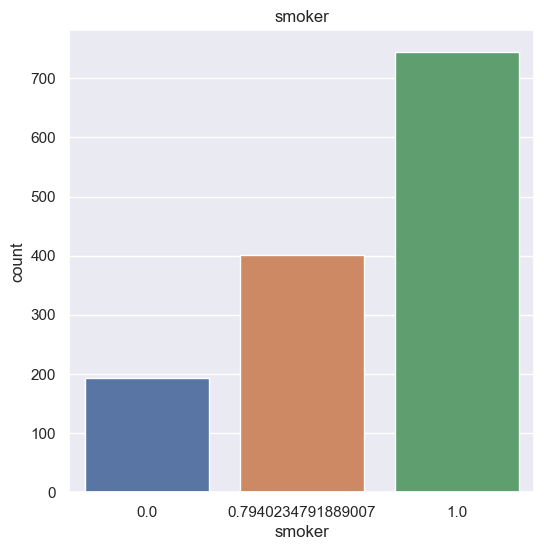

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset_nans)
plt.title('smoker')
plt.show()

In [29]:
insurance_dataset_nans['smoker'].value_counts()

smoker
1.000000    744
0.794023    401
0.000000    193
Name: count, dtype: int64

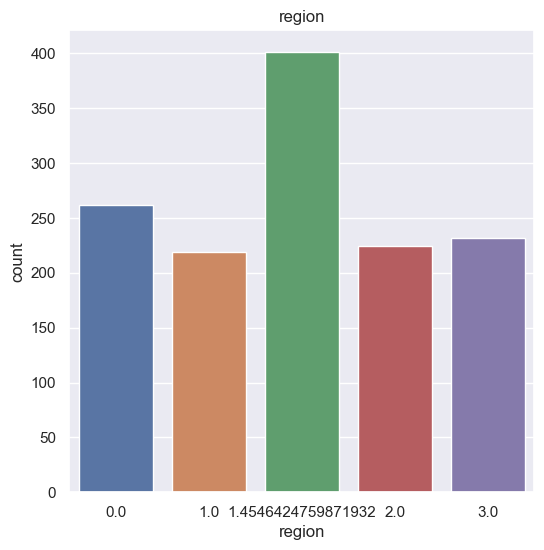

In [30]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset_nans)
plt.title('region')
plt.show()

In [31]:
insurance_dataset_nans['region'].value_counts()

region
1.454642    401
0.000000    262
3.000000    232
2.000000    224
1.000000    219
Name: count, dtype: int64

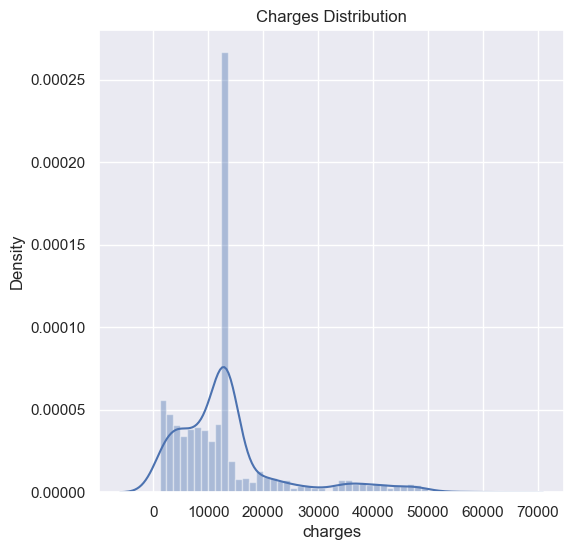

In [32]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['charges'])
plt.title('Charges Distribution')
plt.show()

Splitting the Features and Target

In [35]:
X=insurance_dataset_nans.drop(columns='charges',axis=1)
y=insurance_dataset_nans['charges']
print(X)

            age       sex        bmi  children    smoker    region
0     19.000000  0.503735  27.900000   0.00000  0.794023  1.000000
1     18.000000  0.000000  33.770000   1.11953  1.000000  0.000000
2     28.000000  0.000000  33.000000   3.00000  1.000000  0.000000
3     39.421558  0.503735  22.705000   0.00000  1.000000  3.000000
4     39.421558  0.000000  30.368911   0.00000  0.794023  3.000000
...         ...       ...        ...       ...       ...       ...
1333  39.421558  0.000000  30.368911   1.11953  1.000000  3.000000
1334  18.000000  1.000000  31.920000   0.00000  1.000000  2.000000
1335  18.000000  1.000000  36.850000   0.00000  1.000000  0.000000
1336  21.000000  1.000000  25.800000   1.11953  1.000000  1.454642
1337  61.000000  1.000000  29.070000   1.11953  0.000000  1.454642

[1338 rows x 6 columns]


In [36]:
print(y)

0       16884.924000
1       13252.908554
2       13252.908554
3       13252.908554
4       13252.908554
            ...     
1333    10600.548300
1334     2205.980800
1335    13252.908554
1336     2007.945000
1337    29141.360300
Name: charges, Length: 1338, dtype: float64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) #we took 20 or 20 percent of data as testing data we took 20% test data and 80% to training data
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
#loading the Linear Regression Model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [39]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [40]:
from sklearn import metrics
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared vale:',r2_train)

R squared vale: 0.3532385702923144


In [41]:
#prediction on training data
test_data_prediction=regressor.predict(X_test)

In [42]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared vale:',r2_test)

R squared vale: 0.3534564957927865


Building a predictive system

In [43]:
input_data=(31,1,25.74,0,1,0) # charges: 3756.6216
#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[7789.46672349]
The insurance cost is USD 7789.466723493546


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_charges, predicted_charges)

# Calculate Mean Squared Error
mse = mean_squared_error(actual_charges, predicted_charges)

# Calculate Root Mean Squared Error (optional, for better interpretability)
rmse = mse ** 0.5

# Calculate R² Score
r2 = r2_score(actual_charges, predicted_charges)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 4032.845123493546
Mean Squared Error (MSE): 16263839.790085675
Root Mean Squared Error (RMSE): 4032.845123493546
R² Score: nan


In [45]:
from sklearn.metrics import mean_absolute_error

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(actual_charges, predicted_charges) / actual_charges[0] * 100

# Accuracy percentage
accuracy = 100 - mape

print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Accuracy Percentage:", accuracy, "%")


Mean Absolute Percentage Error (MAPE): 107.35297703376743 %
Accuracy Percentage: -7.352977033767431 %


Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Initialize Ridge Regression with a regularization parameter alpha
ridge_regressor = Ridge(alpha=1.0)  # Adjust alpha as needed

In [50]:
# Fit the Ridge Regression model
ridge_regressor.fit(X_train, y_train)

Ridge()

In [51]:
# Predictions on training data
ridge_train_predictions = ridge_regressor.predict(X_train)

In [52]:
# R² Score for training data
ridge_r2_train = r2_score(y_train, ridge_train_predictions)
print('Ridge Regression R² Score (Train):', ridge_r2_train)

Ridge Regression R² Score (Train): 0.3532190942048289


In [53]:
# Predictions on test data
ridge_test_predictions = ridge_regressor.predict(X_test)

In [55]:
# R² Score for test data
ridge_r2_test = r2_score(y_test, ridge_test_predictions)
print('Ridge Regression R² Score (Test):', ridge_r2_test)

Ridge Regression R² Score (Test): 0.35352726932976974


In [56]:
# Calculate MAE, MSE, and RMSE for Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_test_predictions)
ridge_mse = mean_squared_error(y_test, ridge_test_predictions)
ridge_rmse = ridge_mse ** 0.5
print("Ridge Regression Mean Absolute Error (MAE):", ridge_mae)
print("Ridge Regression Mean Squared Error (MSE):", ridge_mse)
print("Ridge Regression Root Mean Squared Error (RMSE):", ridge_rmse)

Ridge Regression Mean Absolute Error (MAE): 5808.494542211489
Ridge Regression Mean Squared Error (MSE): 68272136.57549466
Ridge Regression Root Mean Squared Error (RMSE): 8262.69547880682


In [57]:
# Ridge Regression on sample input data
ridge_prediction = ridge_regressor.predict(input_data_reshaped)
print('The Ridge Regression predicted insurance cost is USD', ridge_prediction[0])

The Ridge Regression predicted insurance cost is USD 7814.991068636738


In [58]:
# MAPE and Accuracy for Ridge Regression
ridge_mape = mean_absolute_error(actual_charges, ridge_prediction) / actual_charges[0] * 100
ridge_accuracy = 100 - ridge_mape
print("Ridge Regression Mean Absolute Percentage Error (MAPE):", ridge_mape, "%")
print("Ridge Regression Accuracy Percentage:", ridge_accuracy, "%")

Ridge Regression Mean Absolute Percentage Error (MAPE): 108.03242649290891 %
Ridge Regression Accuracy Percentage: -8.032426492908911 %


SVM as regressor

In [59]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# Initialize the SVR model with RBF kernel
svr_regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [61]:
# Fit the SVR model to the training data
svr_regressor.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [62]:
# Predictions on training data
svr_train_predictions = svr_regressor.predict(X_train)

In [63]:
# R² Score for training data
svr_r2_train = r2_score(y_train, svr_train_predictions)
print('SVM R² Score (Train):', svr_r2_train)

SVM R² Score (Train): 0.013978071326472441


In [64]:
# Predictions on test data
svr_test_predictions = svr_regressor.predict(X_test)

In [65]:
# R² Score for test data
svr_r2_test = r2_score(y_test, svr_test_predictions)
print('SVM R² Score (Test):', svr_r2_test)

SVM R² Score (Test): 0.008657757774676367


In [66]:
# Calculate MAE, MSE, and RMSE for SVM Regression
svr_mae = mean_absolute_error(y_test, svr_test_predictions)
svr_mse = mean_squared_error(y_test, svr_test_predictions)
svr_rmse = svr_mse ** 0.5
print("SVM Mean Absolute Error (MAE):", svr_mae)
print("SVM Mean Squared Error (MSE):", svr_mse)
print("SVM Root Mean Squared Error (RMSE):", svr_rmse)

SVM Mean Absolute Error (MAE): 6298.10689286884
SVM Mean Squared Error (MSE): 104692819.57816862
SVM Root Mean Squared Error (RMSE): 10231.950917501932


In [67]:
# SVM Regression on sample input data
svr_prediction = svr_regressor.predict(input_data_reshaped)
print('The SVM predicted insurance cost is USD', svr_prediction[0])

The SVM predicted insurance cost is USD 13119.381863142486


In [68]:
# MAPE and Accuracy for SVM Regression
svr_mape = mean_absolute_error(actual_charges, svr_prediction) / actual_charges[0] * 100
svr_accuracy = 100 - svr_mape

print("SVM Mean Absolute Percentage Error (MAPE):", svr_mape, "%")
print("SVM Accuracy Percentage:", svr_accuracy, "%")

SVM Mean Absolute Percentage Error (MAPE): 249.23352043608773 %
SVM Accuracy Percentage: -149.23352043608773 %


In [69]:
# Evaluate SVR performance with regression-specific metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R² Score
r2 = r2_score(y_test, svr_test_predictions)
print("R² Score:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, svr_test_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, svr_test_predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: 0.008657757774676367
Mean Absolute Error (MAE): 6298.10689286884
Root Mean Squared Error (RMSE): 10231.950917501932


Decision Tree as regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=2)

In [72]:
# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [74]:
# Predictions on training data
dt_train_predictions = dt_regressor.predict(X_train)

In [75]:
# R² Score for training data
dt_r2_train = r2_score(y_train, dt_train_predictions)
print('Decision Tree R² Score (Train):', dt_r2_train)

Decision Tree R² Score (Train): 0.9915422650579993


In [76]:
# Predictions on test data
dt_test_predictions = dt_regressor.predict(X_test)

In [77]:
# R² Score for test data
dt_r2_test = r2_score(y_test, dt_test_predictions)
print('Decision Tree R² Score (Test):', dt_r2_test)

Decision Tree R² Score (Test): -0.14395107735971968


In [79]:
# Calculate MAE, MSE, and RMSE for Decision Tree Regression
dt_mae = mean_absolute_error(y_test, dt_test_predictions)
dt_mse = mean_squared_error(y_test, dt_test_predictions)
dt_rmse = dt_mse ** 0.5
print("Decision Tree Mean Absolute Error (MAE):", dt_mae)
print("Decision Tree Mean Squared Error (MSE):", dt_mse)
print("Decision Tree Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Mean Absolute Error (MAE): 6889.000369437909
Decision Tree Mean Squared Error (MSE): 120809402.29020478
Decision Tree Root Mean Squared Error (RMSE): 10991.33305337459


In [80]:
# Decision Tree Regression on sample input data
dt_prediction = dt_regressor.predict(input_data_reshaped)
print('The Decision Tree predicted insurance cost is USD', dt_prediction[0])

The Decision Tree predicted insurance cost is USD 17626.23951


In [81]:
# MAPE and Accuracy for Decision Tree Regression
dt_mape = mean_absolute_error(actual_charges, dt_prediction) / actual_charges[0] * 100
dt_accuracy = 100 - dt_mape

print("Decision Tree Mean Absolute Percentage Error (MAPE):", dt_mape, "%")
print("Decision Tree Accuracy Percentage:", dt_accuracy, "%")

Decision Tree Mean Absolute Percentage Error (MAPE): 369.20455097207554 %
Decision Tree Accuracy Percentage: -269.20455097207554 %


Naive bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
# Binning 'charges' into categories (low, medium, high)
insurance_dataset['charges_category'] = pd.cut(
    insurance_dataset['charges'],
    bins=[0, 10000, 20000, insurance_dataset['charges'].max()],
    labels=['Low', 'Medium', 'High']
)

In [84]:
# Drop the original 'charges' column
X = insurance_dataset.drop(columns=['charges', 'charges_category'], axis=1)
y = insurance_dataset['charges_category']

In [85]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [86]:
# Initialize Gaussian Naïve Bayes model
nb_model = GaussianNB()

In [87]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [88]:
# Predictions
y_pred = nb_model.predict(X_test)

In [89]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naïve Bayes Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naïve Bayes Accuracy: 0.6865671641791045

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.75      0.72        51
         Low       0.69      1.00      0.81       146
      Medium       0.00      0.00      0.00        71

    accuracy                           0.69       268
   macro avg       0.46      0.58      0.51       268
weighted avg       0.50      0.69      0.58       268


Confusion Matrix:
 [[ 38  13   0]
 [  0 146   0]
 [ 17  54   0]]


Lasso

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
# Ensure you're using the continuous 'charges' column as the target
# X is the same as before (features excluding 'charges')
# y should be the 'charges' column, not the 'charges_category'

X = insurance_dataset.drop(columns=['charges', 'charges_category'], axis=1)  # Drop 'charges_category' if present
y = insurance_dataset['charges']  # Use 'charges' as the target variable

In [92]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [93]:
# Initialize the Lasso Regressor
lasso_regressor = Lasso(alpha=1.0, random_state=2)

In [94]:
# Fit the Lasso model to the training data
lasso_regressor.fit(X_train, y_train)

Lasso(random_state=2)

In [95]:
# Predictions on training data
lasso_train_predictions = lasso_regressor.predict(X_train)

In [96]:
# R² Score for training data
lasso_r2_train = r2_score(y_train, lasso_train_predictions)
print('Lasso R² Score (Train):', lasso_r2_train)

Lasso R² Score (Train): 0.7515055550686265


In [98]:
 # Predictions on test data
lasso_test_predictions = lasso_regressor.predict(X_test)

In [99]:
# R² Score for test data
lasso_r2_test = r2_score(y_test, lasso_test_predictions)
print('Lasso R² Score (Test):', lasso_r2_test)

Lasso R² Score (Test): 0.7447245444913575


In [100]:
 # Calculate MAE, MSE, and RMSE for Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_test_predictions)
lasso_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_rmse = lasso_mse ** 0.5

print("Lasso Mean Absolute Error (MAE):", lasso_mae)
print("Lasso Mean Squared Error (MSE):", lasso_mse)
print("Lasso Root Mean Squared Error (RMSE):", lasso_rmse)

Lasso Mean Absolute Error (MAE): 4267.164610260892
Lasso Mean Squared Error (MSE): 38337462.37180757
Lasso Root Mean Squared Error (RMSE): 6191.725314628191


In [102]:
# Lasso Regression on sample input data
lasso_prediction = lasso_regressor.predict(input_data_reshaped)
print('The Lasso predicted insurance cost is USD', lasso_prediction[0])

The Lasso predicted insurance cost is USD 3761.9100317716984


In [103]:
# MAPE and Accuracy for Lasso Regression
lasso_mape = mean_absolute_error(actual_charges, lasso_prediction) / actual_charges[0] * 100
lasso_accuracy = 100 - lasso_mape

print("Lasso Mean Absolute Percentage Error (MAPE):", lasso_mape, "%")
print("Lasso Accuracy Percentage:", lasso_accuracy, "%")

Lasso Mean Absolute Percentage Error (MAPE): 0.14077627013853272 %
Lasso Accuracy Percentage: 99.85922372986147 %


Neural Network

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dense(64, activation='relu'),                              # Hidden layer with 64 neurons
    Dense(32, activation='relu'),                              # Hidden layer with 32 neurons
    Dense(1)                                                   # Output layer for regression (1 neuron)
])

In [108]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [109]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,            # Number of training epochs
    batch_size=32,         # Batch size for training
    verbose=1              # Show training progress
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 337613440.0000 - mae: 13588.7295 - val_loss: 263194944.0000 - val_mae: 12313.0410
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 359114144.0000 - mae: 13979.4482 - val_loss: 262788432.0000 - val_mae: 12298.5459
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 354142016.0000 - mae: 13976.1562 - val_loss: 261235984.0000 - val_mae: 12245.8428
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 318670912.0000 - mae: 13046.4541 - val_loss: 256807088.0000 - val_mae: 12101.2822
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 342019424.0000 - mae: 13692.3926 - val_loss: 246574240.0000 - val_mae: 11776.1133
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 331495520.0000 - mae: 13308.3711 - val_loss: 227202176.0000 - val_mae: 11160.3350
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 269259200.0000 - mae: 11947.7949 - val_loss: 196069312.0000 - val_mae: 10144.0557
Epoch 

In [110]:
# Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss (MSE):", test_loss)
print("Test Mean Absolute Error (MAE):", test_mae)

Test Loss (MSE): 25819794.0
Test Mean Absolute Error (MAE): 3163.075439453125


In [111]:
# Predictions on Test Data
nn_predictions = model.predict(X_test_scaled)
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)
     

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Neural Network R² Score: 0.8280752202173007


In [112]:
# Calculate MAE, MSE, and RMSE for Neural Network
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = nn_mse ** 0.5
print("Neural Network Mean Absolute Error (MAE):", nn_mae)
print("Neural Network Mean Squared Error (MSE):", nn_mse)
print("Neural Network Root Mean Squared Error (RMSE):", nn_rmse)

Neural Network Mean Absolute Error (MAE): 3163.075579372376
Neural Network Mean Squared Error (MSE): 25819794.396478474
Neural Network Root Mean Squared Error (RMSE): 5081.318175087885


In [113]:
# Neural Network Prediction for Sample Input
sample_prediction = model.predict(input_data_reshaped)
print('The Neural Network predicted insurance cost is USD', sample_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
The Neural Network predicted insurance cost is USD 269138.62


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# R² Score for Test Data
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)

# MAPE and Accuracy
nn_mape = mean_absolute_error(y_test, nn_predictions) / y_test.mean() * 100  # MAPE as a percentage
nn_accuracy = 100 - nn_mape  # Accuracy as a percentage

print("Neural Network Mean Absolute Percentage Error (MAPE):", nn_mape, "%")
print("Neural Network Accuracy Percentage:", nn_accuracy, "%")

Neural Network R² Score: 0.8280752202173007
Neural Network Mean Absolute Percentage Error (MAPE): 24.612079924192834 %
Neural Network Accuracy Percentage: 75.38792007580716 %


Comparison between models

In [115]:
# Initialize a dictionary to store results
model_results = {
    "Model": [],
    "R² Score (Train)": [],
    "R² Score (Test)": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "MAPE (%)": [],
    "Accuracy (%)": []  # Add Accuracy Percentage column
}   

In [116]:
# Helper function to evaluate models
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse ** 0.5
    mape = (mae / y_test.mean()) * 100
    accuracy = 100 - mape  # Accuracy is 100 - MAPE
    model_results["Model"].append(name)
    model_results["R² Score (Train)"].append(r2_train)
    model_results["R² Score (Test)"].append(r2_test)
    model_results["MAE"].append(mae)
    model_results["MSE"].append(mse)
    model_results["RMSE"].append(rmse)
    model_results["MAPE (%)"].append(mape)
    model_results["Accuracy (%)"].append(accuracy)

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Discretize the target variable (y) into categories
n_bins = 10  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

# Fit Naïve Bayes
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train_binned)

# Predict
nb_train_pred_binned = nb_regressor.predict(X_train)
nb_test_pred_binned = nb_regressor.predict(X_test)

# Convert predictions back to continuous values
nb_train_pred = discretizer.inverse_transform(nb_train_pred_binned.reshape(-1, 1)).ravel()
nb_test_pred = discretizer.inverse_transform(nb_test_pred_binned.reshape(-1, 1)).ravel()

# Evaluate Model
evaluate_model("Naïve Bayes Regression", y_train, nb_train_pred, y_test, nb_test_pred)

# Linear Regression
linear_train_pred = regressor.predict(X_train)
linear_test_pred = regressor.predict(X_test)
evaluate_model("Linear Regression", y_train, linear_train_pred, y_test, linear_test_pred)

# Ridge Regression
ridge_train_pred = ridge_regressor.predict(X_train)
ridge_test_pred = ridge_regressor.predict(X_test)
evaluate_model("Ridge Regression", y_train, ridge_train_pred, y_test, ridge_test_pred)

# Lasso Regression
lasso_train_pred = lasso_regressor.predict(X_train)
lasso_test_pred = lasso_regressor.predict(X_test)
evaluate_model("Lasso Regression", y_train, lasso_train_pred, y_test, lasso_test_pred)

# SVM Regression
svm_train_pred = svr_regressor.predict(X_train)
svm_test_pred = svr_regressor.predict(X_test)
evaluate_model("SVM Regression", y_train, svm_train_pred, y_test, svm_test_pred)

# Decision Tree Regression
dt_train_pred = dt_regressor.predict(X_train)
dt_test_pred = dt_regressor.predict(X_test)
evaluate_model("Decision Tree Regression", y_train, dt_train_pred, y_test, dt_test_pred)

# Neural Network
nn_train_pred = model.predict(X_train_scaled).flatten()  # Flatten predictions to match dimensions
nn_test_pred = model.predict(X_test_scaled).flatten()
evaluate_model("Neural Network", y_train, nn_train_pred, y_test, nn_test_pred)

# Convert Results to DataFrame
results_df = pd.DataFrame(model_results)

# Display the Results
print(results_df)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
                      Model  R² Score (Train)  R² Score (Test)          MAE  \
0    Naïve Bayes Regression          0.477580         0.376189  5818.511486   
1         Linear Regression          0.669897         0.664500  5123.305954   
2          Ridge Regression          0.667602         0.662393  5139.510637   
3          Lasso Regression          0.751506         0.744725  4267.164610   
4            SVM Regression          0.007346         0.005399  9121.683791   
5  Decision Tree Regression          0.553862         0.525410  5303.477980   
6            Neural Network          0.835657         0.828075  3163.075579   

            MSE          RMSE   MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071793  45.274185     54.725815  
1  5.038571e+07   7098.289222  39.864749     60.135251  
2  5.070203e+07   7120.536058  39.990839     60.009161  
3  3.833746e+07   6191.725315  33.203063     66.796937  
4  1

In [118]:
import matplotlib.pyplot as plt

# Add an Accuracy Percentage column to the results
results_df["Accuracy (%)"] = 100 - results_df["MAPE (%)"]

# Display the Results
print(results_df)

# Define a consistent color palette for all plots
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#E58606']

                      Model  R² Score (Train)  R² Score (Test)          MAE  \
0    Naïve Bayes Regression          0.477580         0.376189  5818.511486   
1         Linear Regression          0.669897         0.664500  5123.305954   
2          Ridge Regression          0.667602         0.662393  5139.510637   
3          Lasso Regression          0.751506         0.744725  4267.164610   
4            SVM Regression          0.007346         0.005399  9121.683791   
5  Decision Tree Regression          0.553862         0.525410  5303.477980   
6            Neural Network          0.835657         0.828075  3163.075579   

            MSE          RMSE   MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071793  45.274185     54.725815  
1  5.038571e+07   7098.289222  39.864749     60.135251  
2  5.070203e+07   7120.536058  39.990839     60.009161  
3  3.833746e+07   6191.725315  33.203063     66.796937  
4  1.493699e+08  12221.699477  70.976366     29.023634  
5  7.127425e+07   8442.40

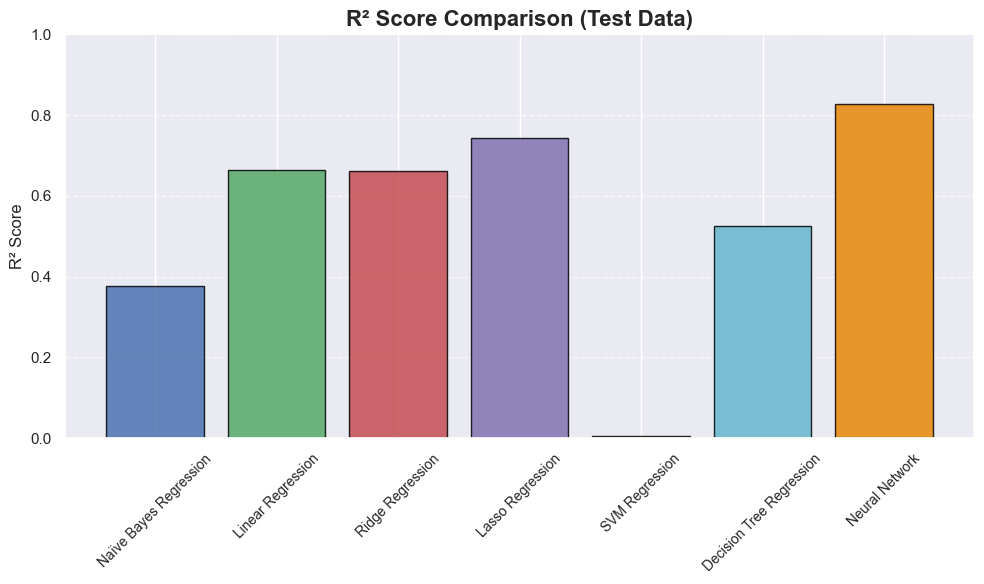

In [119]:
# Plot R² Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R² Score (Test)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("R² Score Comparison (Test Data)", fontsize=16, weight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1)  # R² Score is typically between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

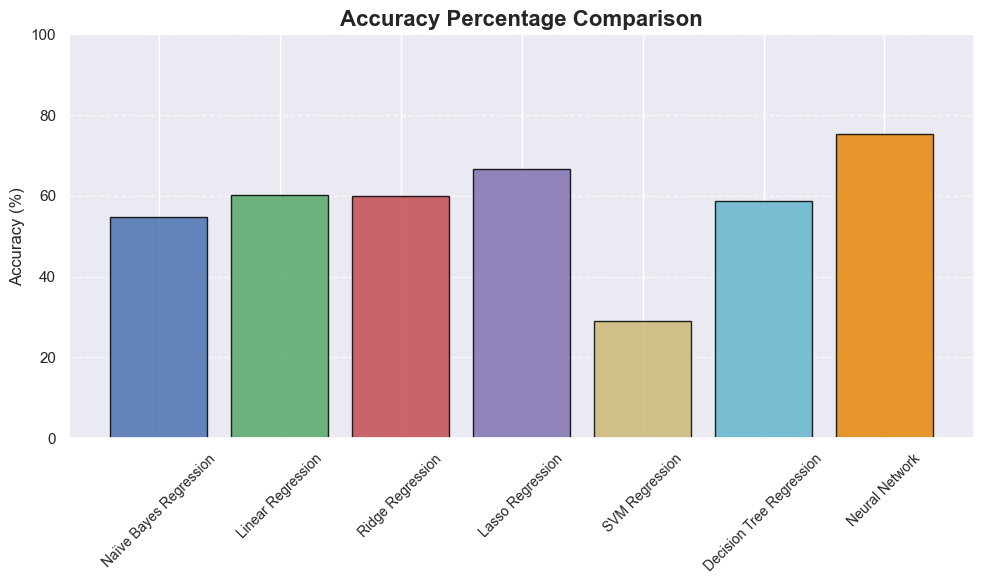

In [120]:
# Plot Accuracy Percentage
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy (%)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("Accuracy Percentage Comparison", fontsize=16, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 100)  # Accuracy percentages range from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

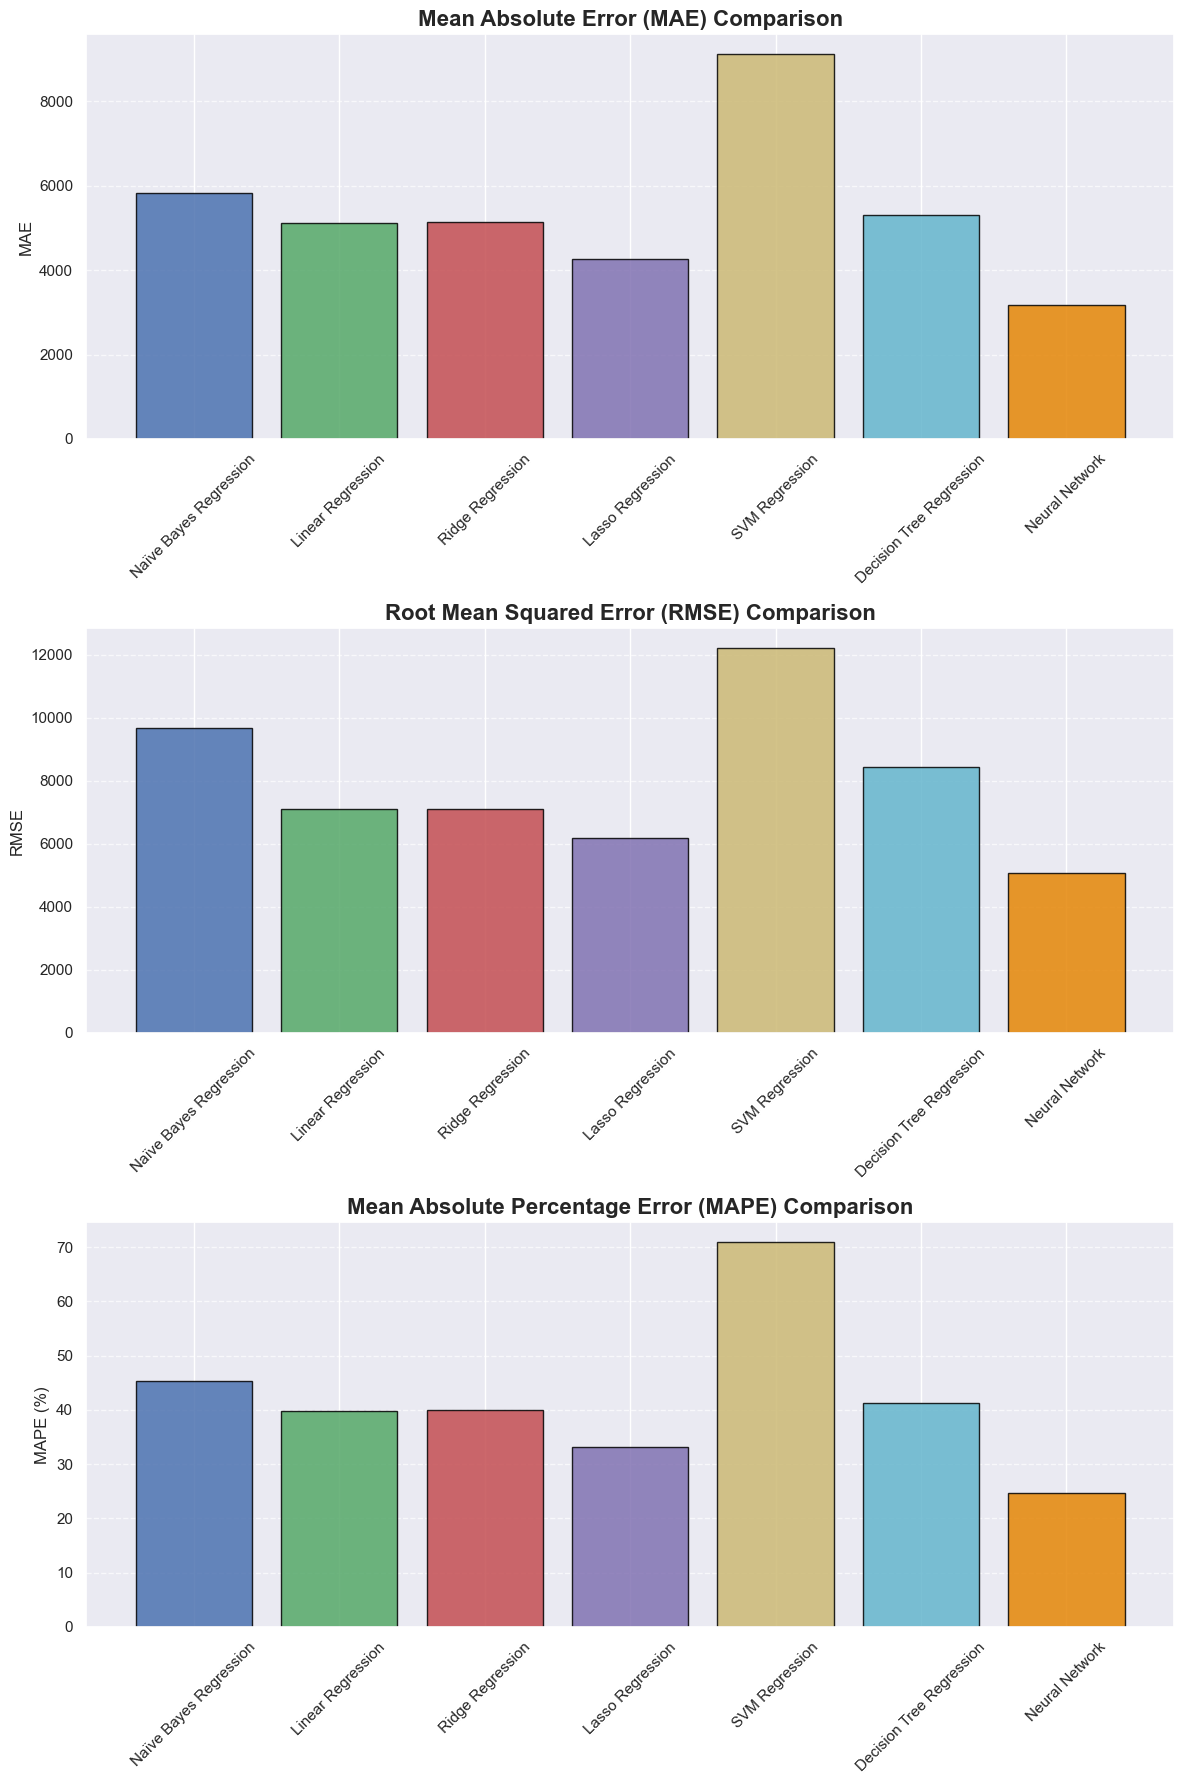

In [121]:
# Plot MAE, RMSE, and MAPE Comparison
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# MAE Plot
axs[0].bar(results_df["Model"], results_df["MAE"], color=colors, alpha=0.85, edgecolor='black')
axs[0].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16, weight='bold')
axs[0].set_ylabel("MAE", fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', labelrotation=45)

# RMSE Plot
axs[1].bar(results_df["Model"], results_df["RMSE"], color=colors, alpha=0.85, edgecolor='black')
axs[1].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16, weight='bold')
axs[1].set_ylabel("RMSE", fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', labelrotation=45)

# MAPE Plot
axs[2].bar(results_df["Model"], results_df["MAPE (%)"], color=colors, alpha=0.85, edgecolor='black')
axs[2].set_title("Mean Absolute Percentage Error (MAPE) Comparison", fontsize=16, weight='bold')
axs[2].set_ylabel("MAPE (%)", fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', labelrotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()